[[-5.724     +0.00000000e+00j -0.324     +0.00000000e+00j
   0.324     +0.00000000e+00j  5.724     +0.00000000e+00j]
 [-5.72399824+2.71504573e-19j -0.32403115-6.29668966e-19j
   0.32403115+6.29668966e-19j  5.72399824-2.71504573e-19j]
 [-5.72399295+6.44208238e-19j -0.32412458+3.84190148e-19j
   0.32412458-3.84190148e-19j  5.72399295-6.44208238e-19j]
 ...
 [-4.06028672-1.10846267e-16j -4.04761952+1.11193165e-16j
   4.04761952-1.11193165e-16j  4.06028672+1.10846267e-16j]
 [-4.05712363+2.17009756e-19j -4.05079003-2.16670981e-19j
   4.05079003+2.16670981e-19j  4.05712363-2.17009756e-19j]
 [-4.05395807+2.78347093e-33j -4.05395807-2.78347093e-33j
   4.05395807-1.20942603e-48j  4.05395807+8.55284707e-49j]]


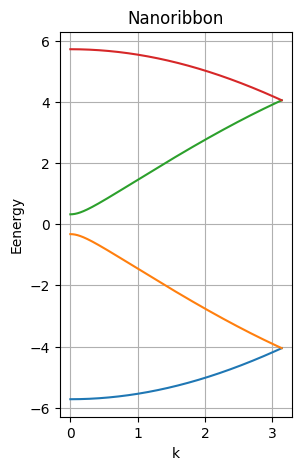

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets

a = 1
kpts = np.linspace(0, np.pi/a, 1000)

t = -2.7
te = -2.7*1.12
def energy(k):
    D = np.array([
        [0, t, 0, te*np.exp(-1j*k*a)],
        [t, 0, te, 0],
        [0, te, 0, t],
        [te*np.exp(1j*k*a), 0, t, 0]
    ])

    E, v = np.linalg.eig(D)
    return np.sort(E)

E = []
for k in kpts:
    E.append(energy(k))
E = np.array(E)

A = np.array(E)
print (A)

plt.figure(figsize=(3, 5))
plt.plot(kpts, E)
plt.xlabel('k')
plt.ylabel('Eenergy')
plt.title('Nanoribbon')
plt.grid(True)
plt.show()

In [32]:
import numpy as np
import matplotlib.pyplot as plt

a = 1
kpts = np.linspace(0, np.pi/a, 1000)
num_bandgap = 2
t = -2.7
te = -2.7*1.12

def energy(k):
    D = np.array((2 * num_bandgap, 2 * num_bandgap), dtype=complex)

    for i in range(num_bandgap - 1):
        D[i, i + 1] = t
        D[i + 1, i] = t
        D[i, i] = 0
        D[i, i + 2] = 0
        D[i, i + 3] = te * np.exp(-1j*k*a)
        D[i +2, i] = 0
        D[i + 3, i] = te * np.exp(1j*k*a)

    #D[0, 1] = D[1, 0] = te * np.exp(-1j * k * a)


   # for i in range(num_bandgap - 1):
    #    D[i + num_bandgap, i + 1 + num_bandgap] = t
     #   D[i + 1 + num_bandgap, i + num_bandgap] = t

    E = np.sort(np.linalg.eigvals(D))
    return E

E_k = np.array([energy(k) for k in kpts])

plt.figure(figsize=(8, 5))
for i in range(len(E_k[0])):
    plt.plot(kpts, E_k[:, i], label=f'E_k{i+1}')

print (np.array(E_k))
plt.xlabel('k')
plt.ylabel('Energy')
plt.title('Nanoribbon')
plt.legend()
plt.grid(True)
plt.show()


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

c:\Users\ileti\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\ileti\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


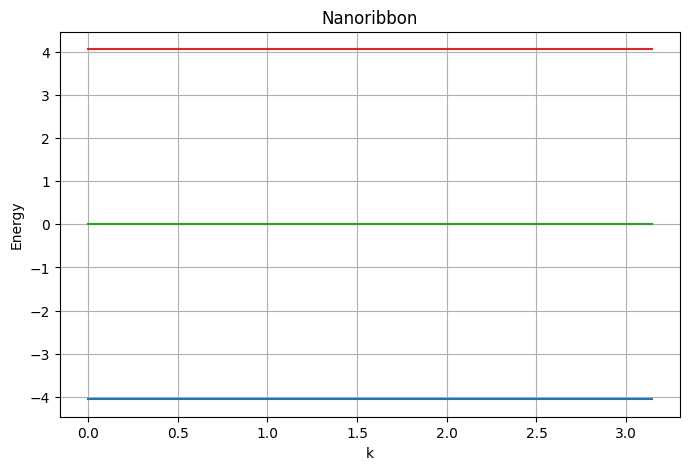

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets


# Lattice parameter
a = 1

# k-points
kpts = np.linspace(0, np.pi/a, 1000)

# Hopping parameters
t = -2.7
te = -2.7 * 1.12

def energy(k, n):
    # Hamiltonian matrix
    D = np.zeros((2 * n, 2 * n), dtype=complex)

    for i in range(n-1):
        D[i, i + 1] = t
        D[i + 1, i] = t
        D[i, i] = 0
        D[i, i + 2] = 0
        D[i + 2, i] = 0
        D[i, i + 3] = te * np.exp(-1j * k * a)
        D[i + 3, i] = te * np.exp(1j * k * a)
    # Eigenvalues and eigenvectors
    E, v = np.linalg.eig(D)
    return np.sort(E)

# Nanoribbon size
n = 2

# Calculate energy for each k-point
E = []
for k in kpts:
    E.append(energy(k, n))
E = np.array(E)

# Plot the band structure
plt.figure(figsize=(8, 5))
plt.plot(kpts, E)
plt.xlabel('k')
plt.ylabel('Energy')
plt.title('Nanoribbon')
plt.grid(True)
plt.show()


c:\Users\ileti\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\ileti\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


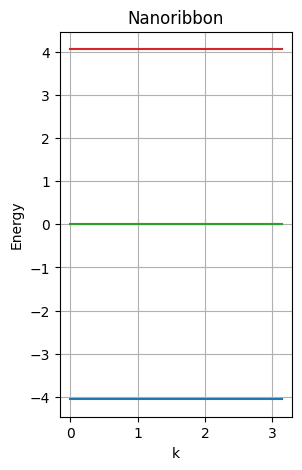

In [38]:
import numpy as np
import matplotlib.pyplot as plt

a = 1
n = 2
kpts = np.linspace(0, np.pi/a, 1000)
t = -2.7
te = -2.7 * 1.12

def energy(k):
    # Hamiltonian matrix
    D = np.zeros((2 * n, 2 * n), dtype=complex)

    for i in range(n-1):
        D[i, i + 1] = t
        D[i + 1, i] = t
        D[i, i+3] = te * np.exp(-1j * k * a)
        D[i+3, i] = te * np.exp(1j * k * a)
        D[i, i] = 0

  

    # Eigenvalues and eigenvectors
    E, v = np.linalg.eig(D)
    return np.sort(E)

# Calculate energy for each k-point
E = []
for k in kpts:
    E.append(energy(k))
E = np.array(E)

# Plot the band structure
plt.figure(figsize=(3, 5))
plt.plot(kpts, E)
plt.xlabel('k')
plt.ylabel('Energy')
plt.title('Nanoribbon')
plt.grid(True)
plt.show()


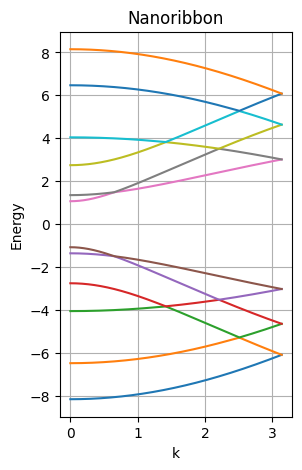

In [4]:
import numpy as np
import matplotlib.pyplot as plt

a = 1
n = 6

kpts = np.linspace(0, np.pi/a, 1000)
t = -2.7
te = -2.7 * 1.12

def energy(k):
    D = np.zeros((2 * n, 2 * n), dtype=complex)
    for i in range(2*n):
        for j in range(2*n):
            if j % 2 != 0 and j == i + 1:
                D[i, j] = t
            elif j % 2 == 0 and j == i + 1:
                D[i, j] = te
            elif j % 2 != 0 and j == i + 3: 
                D[i, j] = te * np.exp(-1j * k * a)
            elif i % 2 == 0 and i == j + 1:
                D[i, j] = te
            elif i % 2 != 0  and i == j + 3:
                D[i, j] = te * np.exp(1j * k * a)
            elif i % 2 != 0  and i == j + 1:
                D[i, j] = t
    E, v = np.linalg.eig(D)
    return np.sort(E)


E = []
for k in kpts:
    E.append(energy(k))
E = np.array(E)


plt.figure(figsize=(3, 5))
plt.plot(kpts, E)
plt.xlabel('k')
plt.ylabel('Energy')
plt.title('Nanoribbon')
plt.grid(True)
plt.show()
